# Property Classification and Clustering
### Blake Williams
### 5/30/18

In [3]:
#import statements and settings
import pandas as pd
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', 500)

In [4]:
#read in and glimpse at the data
properties = pd.read_csv('City_of_Burlington_Property_Details.csv', sep = ',')

properties.iloc[0:10]

,AccountNumber,ParcelID,SpanNumber,StreetNumber,AlternateNumber,StreetName,Unit,CuO1LastName,CuO1FirstName,CuO2LastName,CuO2FirstName,CuO3LastName,CuO3FirstName,LandUse,CurrentAcres,TotalGrossArea,FinishedArea,CurrentValue,CurrentLandValue,CurrentYardItemsValue,CurrentBuildingValue,BuildingType,HeatFuel,HeatType,Grade,YearBlt,SaleDate,SalePrice,LegalReference,GrantorLastName,NumofRooms,NumofBedrooms,Baths,NumofUnits,ZoningCode,Foundation,Depreciation,PropertyCenterPoint,FID
0,6377,045-4-026-000,114-035-16377,29,NaN,MANSFIELD AV,NaN,AMERICAN NATIONAL RED CROSS,NaN,NORTHERN VT CHAPTER,NaN,NaN,NaN,Exempt,0.17218,6225,3519.50000,497100.0,324000,2400,170700.0,OLD STYLE,GAS,HOT AIR,AVERAGE,1890,NaN,0,0,NaN,12,4,1 / 1,1,I,BS,0.300,"(-73.1993, 44.48146)",1001
1,8529,053-3-162-000,114-035-18529,148,NaN,LOCUST TR,NaN,NAUGHTON,ANDREW J,SAMUELS,MARY ANN,NaN,NaN,Single Family,0.18221,2642,1288.00000,235100.0,146900,0,88200.0,RANCH,GAS,HOT AIR,AVERAGEMINUS,1950,NaN,0,0,NaN,6,3,1 / 0,1,RL,C,0.300,"(-73.2126, 44.4648)",1002
2,7207,049-3-005-000,114-035-17207,173,183,ST PAUL ST,NaN,MANSFIELD PROFESSIONAL BLDG,NaN,NaN,NaN,NaN,NaN,Commercial,0.46671,31596,18265.56055,1476300.0,313000,18200,1145100.0,OFFICE GENR,GAS,HOT AIR,AVERAGE,1899,NaN,0,0,NaN,0,0,0 / 5,9,DT,BS,0.180,"(-73.2143, 44.47423)",1003
3,7526,049-4-002-000,114-035-17526,69,NaN,MARBLE AV,NaN,DANGL,JON B,HOWARD,APRIL M,NaN,NaN,Single Family,0.05597,1760,840.00000,152500.0,121600,0,30900.0,OLD STYLE,OIL,HOT AIR,FAIR PLUS,1912,2010-08-24 00:00:00.000,158000,1110-637,"KELLOGG, ALICE M",5,2,1 / 0,1,RM,BS,0.359,"(-73.2122, 44.4691)",1004
4,3935,039-4-136-000,114-035-13935,25,NaN,ST LOUIS ST,NaN,CHALMER,JUDITH R,GIBBONS,ELIZABETH E,NaN,NaN,Single Family,0.08242,2676,1436.00000,241900.0,94400,700,146800.0,FOUR SQUARE,GAS,HOT WATER,AVERAGE,1899,2007-06-21 00:00:00.000,231750,1002-542,"ESSIG, LAURIE L",7,3,1 / 1,1,RM,BS,0.098,"(-73.2125, 44.48854)",1005
5,283,021-2-211-133,114-035-10283,133,NaN,NORTHSHORE DR,Unit 133,BATES,TIMOTHY M,BATES,BETH T,NaN,NaN,Residential Condo,0.00000,2184,1572.80005,268000.0,0,0,268000.0,TOWNHS INT,GAS,HOT WATER,GOOD,1986,2010-10-29 00:00:00.000,381500,1119-83,"MEAU, ANNEMIEKE GRAVEN",6,2,2 / 1,1,RL,S,0.025,"(-73.2681, 44.52157)",1006
6,6202,045-2-220-000,114-035-16202,14,NaN,ADSIT CT,NaN,NOT AVAILABLE,NaN,NaN,NaN,NaN,NaN,Single Family,0.09832,3699,2087.00000,340800.0,130100,0,210700.0,OLD STYLE,GAS,HOT AIR,AVERAGE PLUS,1910,2013-10-01 00:00:00.000,430000,1234-294,"Moakley, Susan K.",8,4,1 / 1,1,RL,BS,0.174,"(-73.2051, 44.48153)",1007
7,10066,058-1-093-000,114-035-20066,68,NaN,CRESCENT RD,NaN,LASH,MILLICENT C,NaN,NaN,NaN,NaN,Single Family,1.01251,7736,4266.60010,655800.0,363000,0,292800.0,CONTEMPORARY,OIL,HOT AIR,AVERAGE PLUS,1950,NaN,0,0,NaN,9,4,4 / 1,1,RL,C,0.246,"(-73.2033, 44.45796)",1008
8,3657,038-4-015-000,114-035-13657,237,NaN,NORTH AV,NaN,"PACKARD LOFTS, LLC",NaN,NaN,NaN,NaN,NaN,Apartments 5+Units,0.70154,62852,37977.00000,1905600.0,547700,51800,1306100.0,APARTMENTS,GAS,HOT WATER,GOOD MINUS,2013,2005-08-23 00:00:00.000,505683,930-86,"CORNELL,CHRIS",103,53,44 / 4,26,RM,S,0.000,"(-73.2258, 44.4877)",1009
9,7867,050-1-062-000,114-035-17867,288,NaN,MAPLE ST,NaN,DI PALMA,ROBERT,DI PALMA,THERESA ALBERGHINI,NaN,NaN,Single Family,0.26113,7454,4433.00000,586500.0,148400,2000,436100.0,VICTORIAN,GAS,HOT WATER,VRYGOODMINUS,1899,NaN,0,0,NaN,7,3,4 / 1,1,I,BS,0.270,"(-73.2076, 44.47417)",1010


## Objectives

I hypothesize that properties in Burlington, VT can be accurately classified based on property type from their attributes. A classifier with high accuracy would confirm this hypothesis. Additionally, I would like to create a dendrogram for cluster analysis. This will reveal which property types are grouped together, ignoring which property type they actually are.

To test this, the relevant variables will be extracted while working in a pandas df. The data will be cleaned. A classifier, such as LDA or random forest, will be used to classify the data with cross validation to reduce bias. Then, hierarchical clustering will be done.


### Variable selection
The following variables are chosen for analysis: 

LandUse

CurrentAcres

TotalGrossArea

FinishedArea

CurrentLandValue

CurrentBuildingValue

BuildingType

Grade

YearBlt

NumofRooms

NumofBedrooms

NumofUnits

ZoningCode

These were selected as variables thought to be relevant and not categorical, except for land use. Additionally, they are not directly dependent upon the other variables, as some were that were excluded.


In [82]:
#Subset the data
properties_reduced = properties[[
    'LandUse',
    'CurrentAcres',          
    'TotalGrossArea',
    'FinishedArea',
    'CurrentLandValue',
    'CurrentBuildingValue',
    'YearBlt',
    'NumofRooms',
    'NumofBedrooms',
    'NumofUnits',]].copy()
#glimpse
properties_reduced.iloc[0:5]

#replace missing
properties_reduced['YearBlt']=properties_reduced['YearBlt'].replace(0,None)
#for obs in properties_reduced['YearBlt']:
#    if obs==0:
#        properties_reduced['YearBlt'].iloc[]

## Summary Statistics

In [83]:
#use reduced variables for analysis
print(format('Variable Name','23s'),format('mean','11s'),format('Std dev','8s'))
for variable in properties_reduced:
    col=properties_reduced[variable]
    if variable !='LandUse':
        print(format(variable,'23s'),format(sum(col)/len(col),'9.2f'), format(np.std(col),'11.2f'))
        
print()
print('max of CurrentBuildingValue:'+format(max(properties_reduced['CurrentBuildingValue'])))
x=properties_reduced['CurrentBuildingValue']
x=x.tolist()
max_ind=0
maxi=x[0]
for i in range(len(x)):
    if x[i]>maxi:
        maxi=x[i]
        max_ind=i
print()
print(properties_reduced.iloc[max_ind])

Variable Name           mean        Std dev 
CurrentAcres                 0.52        5.01
TotalGrossArea            5969.56    30267.91
FinishedArea              3585.57    22153.38
CurrentLandValue        141301.39   448078.25
CurrentBuildingValue    330279.04  3753720.41
YearBlt                   1945.62       36.76
NumofRooms                   7.49       13.17
NumofBedrooms                3.58        8.77
NumofUnits                   2.67       18.86

max of CurrentBuildingValue:367113200.0

LandUse                      Exempt
CurrentAcres                33.6201
TotalGrossArea              2542351
FinishedArea            1.89419e+06
CurrentLandValue           21055700
CurrentBuildingValue    3.67113e+08
YearBlt                        2005
NumofRooms                        0
NumofBedrooms                     0
NumofUnits                       17
Name: 2397, dtype: object


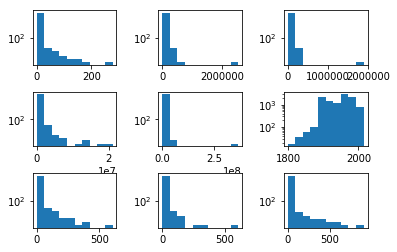

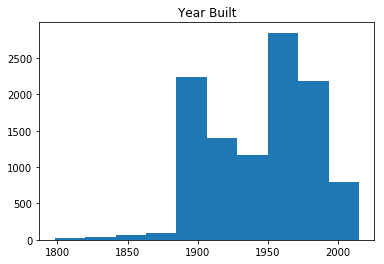

In [98]:
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.hist(properties_reduced.iloc[:, i].tolist(),log=True)
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show()

plt.hist(properties_reduced['YearBlt'].tolist())
plt.title('Year Built')
plt.show()

The histograms of the log-transformed variables show that almost all of them are skewed right, with the exception of the  year the property was built. This variable was bimodal in distrubution, with peaks around 1900 and 1960.

## Classification Analysis

In [65]:
#retrieve variables and category
numerical=properties_reduced.drop('LandUse',axis=1)
land_use=properties_reduced['LandUse']
land_use_list=land_use.tolist()

In [66]:
#fit and predict classifier
clf = RandomForestClassifier()
clf.fit(numerical,land_use)
prediction=clf.predict(numerical)

In [64]:
#check accuracy of predictions
accurate=[]
for i in range(len(prediction)):
    accurate.append(prediction[i]==land_use_list[i])
    
accuracy=accurate.count(True)/len(accurate)
print(format(accuracy*100,'.2f')+'% accuracy for property type classification of properties using a random forest classifier.')

99.59% accuracy for property type classification of properties using a random forest classifier.


In [231]:
#to (maybe) do: columns, freq tables, descriptive stats, hyp tests

## Cluster Analysis

In [71]:
###NOTE: RERUNNING THIS BLOCK WILL TAKE A NEW SAMPLE SUBSET
SAMPLE_SIZE=100
sample=properties_reduced[~properties_reduced['LandUse'].isin(['Exempt','Exempt Land'])].sample(n=SAMPLE_SIZE)
numerical=sample.drop('LandUse',axis=1)
land_use=sample['LandUse']

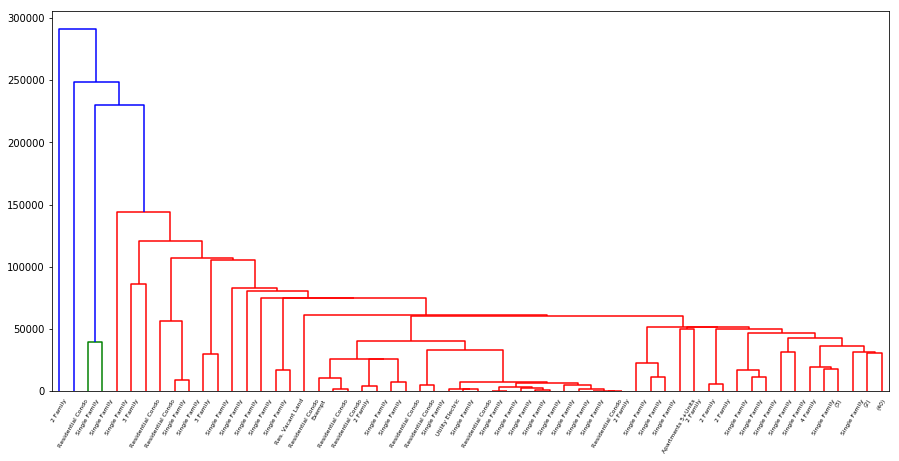

In [72]:
#Create dendrogram
plt.figure(1,figsize=(15,7))
dist=hierarchy.linkage(numerical)
den=hierarchy.dendrogram(dist,labels=land_use_list, truncate_mode='level', p=20, leaf_rotation=60)


## Results

A very accurate classifier can be made to predict the land use of a particular property based on: CurrentAcres, TotalGrossArea, FinishedArea, CurrentLandValue, CurrentBuildingValue, BuildingType, Grade, YearBlt, NumofRooms, NumofBedrooms, NumofUnits, and ZoningCode. The accuracy across multiple trials was >99%.

Given the number of properties, visual analysis of the full data set will be difficult without a very large graphic. However, it appears that subtrees of properties from the same property type are common. For instance, multiple subtrees of Single Family properties are present at varying distances from one another. This shows that properties of the same type are clustered together, however not with all properties of the same type. As a result, different sub-types of each property type appear to exist. 
